<a href="https://colab.research.google.com/github/dohyun93/hongong_mldl/blob/main/2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2-2. 데이터 전처리

> zip() 함수 대신 np.column_stack(), np.concatenate()

In [5]:
numBream = 35
numSmelt = 14
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# numpy는 행렬연산에 특화된 파이썬의 라이브러리다.
import numpy as np

# 여태까지는 zip()을 사용해서 2차원 행렬을 만들었다.
# 하지만 실제 문제를 풀때는 이보다 입력의 규모가 매우 커지고, zip을 활용한 방법은 다소 효율이떨어진다.
# 따라서 이보다 효율적인 방법인 np 라이브러리의 함수를 써보자.
fish_input = [[l, w] for l, w in zip(fish_length, fish_weight)]
#print(fish_input)

# 참고 (파이썬 리스트를 np 배열로 변환)
# np_fish_input = np.array(fish_input)

############# 1. np.column_stack() #################
# 입력을 '튜플' 형태로 주어야 한다는 점에 유의하자!
fish_input = np.column_stack((fish_length, fish_weight))
print(fish_input)

############# 2. np.concatenate() ##################
# 역시 입력을 '튜플' 형태로 주어야 한다는 점에 유의하자!
fish_target = np.concatenate((np.ones(numBream), np.zeros(numSmelt)))
print(fish_target)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [11]:
# 이제 모델에 넣을 형태로 데이터를 전처리했다.
# 훈련세트와 테스트세트로 이제 나누어보자.

# sklearn 을 활용해보자.
from sklearn.model_selection import train_test_split

# random_state: seed값.
# 기본적으로 train_test_split 함수는 25%를 테스트 세트로 분리한다.
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

print(train_input.shape)
print(train_target)
print(test_input.shape)
print(test_target)
# 테스트 세트 타겟의 빙어 비율과 전체데이터에서 빙어의 비율
print(3/13)  # stratify 매개변수를 사용하기 전: 23.07%
print(14/49) # 빙어의 비율 : 28.57% (오차: -5.5%)

(36, 2)
[1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
(13, 2)
[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.23076923076923078
0.2857142857142857


> 위 테스트세트의 타겟을 보면 도미에 대한 데이터 편향성이 일어난 것을 알 수 있다.

일부 클래스의 데이터가 적을 때 이런 현상이 발생할 수 있다.

훈련세트와 테스트세트의 샘플들의 클래스 비율이 일정하지 않다면 모델이 학습을 올바르게 할 수 없다.

이럴 때, `train_test_split()` 의 매개변수 `stratify` 를 사용하면 클래스 비율에 맞게 훈련/테스트 세트를 나눌 수 있다!

In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, stratify=fish_target, random_state=42)
print(test_target)
# stratify 매개변수를 사용한 후 빙어의 테스트세트 타깃 비율
print(4/13) # 30.76%
print(14/49)# 28.57% (오차: +1.19%)

# 5.5 -> 1.19% 로 실제 전체 데이터 대비 빙어의 비율과
# 테스트세트에서 차지하는 빙어의 비율 오차가 꽤 줄어든 것을 알 수 있다.

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
0.3076923076923077
0.2857142857142857


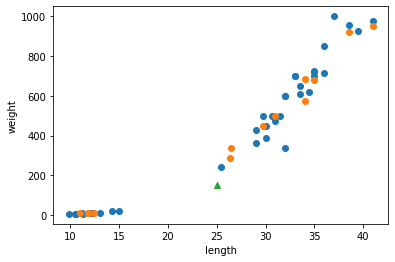

In [22]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

weird_data = np.array([[25, 150]])
kn.predict(weird_data)

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.scatter(weird_data[:,0], weird_data[:,1], marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

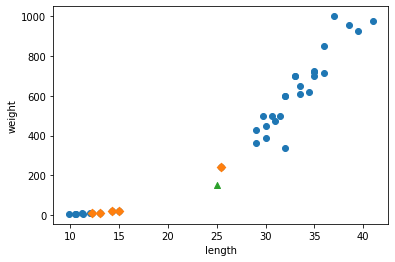

In [24]:
# 위 주어진 [25, 150] 데이터는 빙어에 가깝다고 모델이 분류했다.
# 그 이유를 알아보기 위해 모델이 이웃이라고 판단한 것들을 다시 표시해보자.

nearNeighbors, theirIndexes = kn.kneighbors([[25, 150]])
# 주어진 샘플에서 가장 가까운 이웃과 이웃 샘플의 인덱스를 반환해줌.

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(train_input[theirIndexes,0], train_input[theirIndexes,1], marker='D')
plt.scatter(weird_data[:,0], weird_data[:,1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

위 그림처럼 샘플 데이터 [25, 150]은 육안상 우상단 클래스인 도미에 더 가까우나, 결과는 빙어에 가깝다고 모델이 분류했다.

그 이유는 무엇일까?

KNeighborsClassifier 모델이 길이와 무게를 갖고 근접한 k개의 이웃과 거리를 조사했을 때, x label의 영향보다 y label의 영향을 더 많이 받았다.

즉, x-axis, y-axis의 데이터 스케일이 다르므로 기준이 다른 특성의 산술비교를 했기 때문에 벌어진 오류이다. 

**이 기준을 ML에서는 '스케일(Scale)'이라고 부른다.**

> **스케일이 다른 특성의 데이터는 학습 전 전처리를 거쳐야 한다!**

In [26]:
# 가장 널리 사용되는 전처리 방법 중 하나는 '표준점수'를 사용하는 것이다.
# (standard score, 또는 Z점수라고 부른다.)

# 표준점수는 각 특성값이 0에서 표준편차의 몇 배 만큼 떨어져 있는지를 나타낸다.

# 표준점수: 데이터가 원점에서 몇 표준편차의 배수만큼 떨어져있는가
# 분산: (데이터-평균)의 제곱들의 합의 평균
# 표준편차: 분산의 제곱근

mean = np.mean(train_input, axis=0) # 평균. axis=0이므로 [len, weight]들의 한 열에 대해 모든 행의 평균을 계산한다.
std = np.std(train_input, axis=0) # 표준편차. axis=0이므로 [len, weight]들의 한 열에대해 모든 행의 표준편차를 계산.

########### 각 데이터들에서 평균을 빼고 표준편차로 나누어주면 표준점수다. ##############

print(mean, std) # 훈련세트의 평균과 표준편차

# 표준점수 확인.
scaled_train_input = (train_input-mean)/std
print(scaled_train_input)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]
[[ 0.24070039  0.14198246]
 [-1.51237757 -1.36683783]
 [ 0.5712808   0.76060496]
 [-1.60253587 -1.37766373]
 [ 1.22242404  1.45655528]
 [ 0.17057727 -0.07453542]
 [ 0.87180845  0.80390854]
 [ 0.87180845  1.22457184]
 [ 0.37092904  0.06465464]
 [ 0.77163257  0.82246721]
 [ 0.97198434  1.68853872]
 [-1.61255346 -1.3742613 ]
 [ 0.72154463  0.51315596]
 [-1.53241275 -1.3742613 ]
 [ 0.17057727 -0.28177396]
 [ 0.5712808   0.76060496]
 [ 0.34087627  0.14198246]
 [ 1.12224816  1.54934866]
 [ 0.62136874  0.60594934]
 [-1.30200822 -1.34363949]
 [ 0.42101698  0.14198246]
 [-0.19005591 -0.65604058]
 [-1.75279969 -1.38384995]
 [ 0.47110492  0.45129371]
 [-1.68267658 -1.38137546]
 [ 0.62136874  0.48222484]
 [-1.67265899 -1.38292202]
 [ 0.77163257  0.76060496]
 [ 0.47110492  0.45129371]
 [ 0.77163257  0.83793278]
 [-1.43223687 -1.36683783]
 [ 0.27075315 -0.01267317]
 [ 0.47110492 -0.35291555]
 [-1.2318851  -1.34302087]
 [ 0.27075315 -0.19825992]

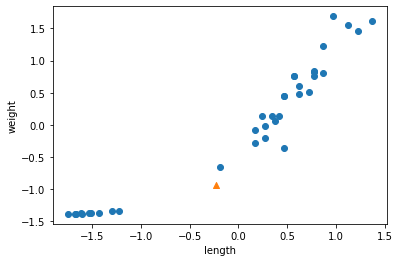

In [27]:
# 이제 샘플도 전처리하여 시각화 해보자.
newSample = ([[25, 150]] - mean) / std
plt.scatter(scaled_train_input[:,0], scaled_train_input[:,1])
plt.scatter(newSample[:,0], newSample[:,1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [29]:
# 이제 두 특성 스케일이 맞춰진 것을 확인할 수 있다.
# 다시 훈련하여 샘플의 분류결과를 확인해보자.

kn.fit(scaled_train_input, train_target)

# 훈련세트와 동일한 기준으로 테스트 세트도 스케일을 맞춰주는 전처리를 한다.
scaled_test_input = (test_input-mean)/std

kn.score(scaled_test_input, test_target)

1.0

In [30]:
# 그럼 과연 샘플의 결과는? (1: 도미)
kn.predict(newSample)

array([1.])

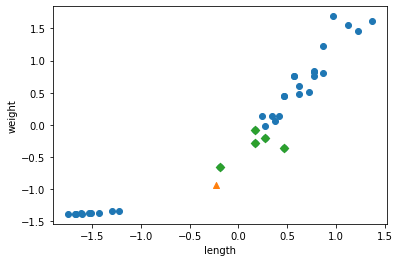

In [34]:
# 마지막으로 최근접 이웃들과 샘플, 훈련 세트를 시각화해보자.
nearNeighbors, theirIndexes = kn.kneighbors(newSample)

plt.scatter(scaled_train_input[:,0], scaled_train_input[:,1])
plt.scatter(newSample[:,0], newSample[:,1], marker='^')
#plt.scatter(nearNeighbors[:,0], nearNeighbors[:,1],marker='D')
plt.scatter(scaled_train_input[theirIndexes,0], scaled_train_input[theirIndexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()